**Environment Setup**

In [12]:
# Uninstall the current Qiskit version
!pip uninstall -y qiskit

# Install Qiskit and IBM Provider with compatible versions
!pip install qiskit==0.43.1 qiskit-ibm-provider==0.6.1


Found existing installation: qiskit 0.43.1
Uninstalling qiskit-0.43.1:
  Successfully uninstalled qiskit-0.43.1
  Using cached qiskit-0.43.1-py3-none-any.whl


In [ ]:
!pip install pylatexenc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=0b24211b9ffd4539f703b1abed6e8f9abce993b3787238a71def1cb2dd7fff75
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


**Basic 4-Qubit Quantum Peg Circuit**

In [ ]:
from qiskit import QuantumCircuit
from qiskit_ibm_provider import IBMProvider
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- 1. Create a 4-qubit circuit ---
qc = QuantumCircuit(4, 4)  # 4 qubits, 4 classical bits (one per qubit)

# --- 2. Step 1: Prepare control qubit (q0) ---
qc.h(0)  # Hadamard puts control qubit into equal superposition

# --- 3. Step 2: Prepare the 'ball' in the middle (q2) ---
qc.x(2)  # Ball starts in the middle peg position

# --- 4. Step 3: First controlled-SWAP: q0 controls swap between q1 and q2 ---
qc.cswap(0, 1, 2)

# --- 5. Step 4: Controlled-NOT from q2 to q0 (as per paper) ---
qc.cx(2, 0)

# --- 6. Step 5: Second controlled-SWAP: q0 controls swap between q2 and q3 ---
qc.cswap(0, 2, 3)

# --- 7. Step 6: Measure all qubits ---
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# --- Draw the circuit ---
qc.draw("text")


┌───┐   ┌───┐      ┌─┐      
q_0: ┤ H ├─■─┤ X ├────■─┤M├──────
     └───┘ │ └─┬─┘┌─┐ │ └╥┘      
q_1: ──────X───┼──┤M├─┼──╫───────
     ┌───┐ │   │  └╥┘ │  ║ ┌─┐   
q_2: ┤ X ├─X───■───╫──X──╫─┤M├───
     └───┘         ║  │  ║ └╥┘┌─┐
q_3: ──────────────╫──X──╫──╫─┤M├
                   ║     ║  ║ └╥┘
c: 4/══════════════╩═════╩══╩══╩═
                   1     0  2  3

**Execute the single-peg circuit locally and plot measurement results**

In [ ]:
!pip install qiskit --quiet

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- Create 4-qubit single peg circuit ---
qc = QuantumCircuit(4, 4)

qc.h(0)      # control qubit in superposition
qc.x(2)      # ball starting in middle
qc.cswap(0, 1, 2)
qc.cx(2, 0)
qc.cswap(0, 2, 3)

qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# --- Run on local simulator ---
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=2048)
result = job.result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)
plt.show()


{'1001': 1037, '0011': 1011}


**Define Multi-Level QGB Circuit Function**

Bin counts: {0: 1193, 6: 4931, 8: 1266, 4: 7559, 2: 5051}


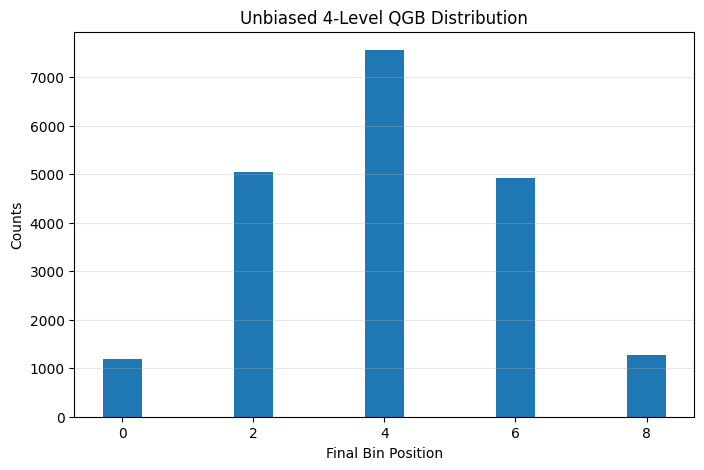

In [15]:
from qiskit import QuantumCircuit, Aer, execute
import matplotlib.pyplot as plt
from collections import Counter

def qgb_4level():
    qc = QuantumCircuit(10, 10)

    qc.reset(0)
    qc.x(5)
    qc.h(0)
    qc.cswap(0, 4, 5)
    qc.cx(5, 0)
    qc.cswap(0, 5, 6)

    qc.reset(0)
    qc.h(0)
    qc.cswap(0, 3, 4)
    qc.cx(4, 0)
    qc.cswap(0, 4, 5)
    qc.cx(5, 0)
    qc.cswap(0, 6, 7)
    qc.cx(6, 0)
    qc.cswap(0, 5, 6)

    qc.reset(0)
    qc.h(0)
    qc.cswap(0, 2, 3)
    qc.cx(3, 0)
    qc.cswap(0, 3, 4)
    qc.cx(4, 0)
    qc.cswap(0, 7, 8)
    qc.cx(7, 0)
    qc.cswap(0, 6, 7)
    qc.cx(6, 0)
    qc.cswap(0, 5, 6)
    qc.cx(5, 0)
    qc.cswap(0, 4, 5)

    qc.reset(0)
    qc.h(0)
    qc.cswap(0, 1, 2)
    qc.cx(2, 0)
    qc.cswap(0, 2, 3)
    qc.cx(3, 0)
    qc.cswap(0, 3, 4)
    qc.cx(4, 0)
    qc.cswap(0, 4, 5)
    qc.cx(5, 0)
    qc.cswap(0, 5, 6)
    qc.cx(6, 0)
    qc.cswap(0, 6, 7)
    qc.cx(7, 0)
    qc.cswap(0, 7, 8)
    qc.cx(8, 0)
    qc.cswap(0, 8, 9)

    for i in range(1, 10):
        qc.measure(i, i)

    return qc

def post_process_qgb(counts):
    """Convert one-hot output to bin index"""
    bin_counts = Counter()
    for bitstring, count in counts.items():
        bits = bitstring[::-1][1:10]  # ignore control qubit
        if '1' in bits:
            bin_index = bits.index('1')
            bin_counts[bin_index] += count
    return dict(bin_counts)

def plot_distribution(bin_counts, title="QGB Output Distribution"):
    bins = sorted(bin_counts.keys())
    values = [bin_counts[b] for b in bins]
    plt.figure(figsize=(8, 5))
    plt.bar(bins, values, width=0.6)
    plt.xlabel("Final Bin Position")
    plt.ylabel("Counts")
    plt.title(title)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

# Run simulation
qc = qgb_4level()
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=20000).result()
counts = result.get_counts()

# Post-process and plot
bin_counts = post_process_qgb(counts)
print("Bin counts:", bin_counts)
plot_distribution(bin_counts, title="Unbiased 4-Level QGB Distribution")
